#model notebook
#here data is extracted and train and put it to the model and we will value our results and optimize the model for better results

#import the libraries

In [17]:
import tensorflow as tf
from cv2 import cv2
import numpy as np
from matplotlib import pyplot as plt 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, Adamax, RMSprop

#extract data from dataset

if data has not been downloaded yet then download it from [Here](https://www.kaggle.com/jangedoo/utkface-new)

In [18]:
fldr='./UTKFace'

In [19]:
import os
files=os.listdir(fldr)

#create list of images from the dataset

In [20]:
from cv2 import cv2
ages=[]
genders=[]
images=[]

for fle in files:
    age = int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total =fldr+'/'+fle
    print(total)
    image=cv2.imread(total)

    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)



170109204516373.jpg.chip.jpg
./UTKFace/8_1_0_20170109204532695.jpg.chip.jpg
./UTKFace/8_1_0_20170109204534346.jpg.chip.jpg
./UTKFace/8_1_0_20170109204542015.jpg.chip.jpg
./UTKFace/8_1_0_20170109204605797.jpg.chip.jpg
./UTKFace/8_1_0_20170109204608113.jpg.chip.jpg
./UTKFace/8_1_0_20170109204627905.jpg.chip.jpg
./UTKFace/8_1_0_20170109204756399.jpg.chip.jpg
./UTKFace/8_1_0_20170109204817102.jpg.chip.jpg
./UTKFace/8_1_0_20170109204818624.jpg.chip.jpg
./UTKFace/8_1_0_20170109204830640.jpg.chip.jpg
./UTKFace/8_1_0_20170109204836782.jpg.chip.jpg
./UTKFace/8_1_0_20170109204901514.jpg.chip.jpg
./UTKFace/8_1_0_20170109204910999.jpg.chip.jpg
./UTKFace/8_1_0_20170109204920415.jpg.chip.jpg
./UTKFace/8_1_0_20170109204933562.jpg.chip.jpg
./UTKFace/8_1_0_20170109204954253.jpg.chip.jpg
./UTKFace/8_1_0_20170109205008946.jpg.chip.jpg
./UTKFace/8_1_0_20170109205015327.jpg.chip.jpg
./UTKFace/8_1_0_20170109205018500.jpg.chip.jpg
./UTKFace/8_1_0_20170109205020218.jpg.chip.jpg
./UTKFace/8_1_0_201701092050228

create list of age and gender from the dataset

In [21]:
for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

viewing a sample

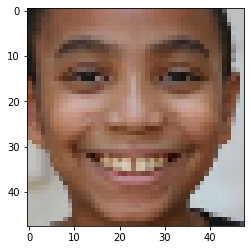

In [22]:
plt.imshow(images[87])

In [23]:
print(ages[87])

10


In [24]:
print(genders[87])

0


#numpy arrays of age and gender

In [25]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

saving images array and genders array in the system

In [26]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

finding the number of elements in dataset, males and females respectively

In [27]:
values, counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


plotting the number of male and female samples

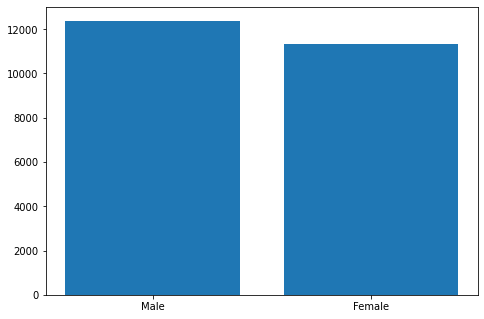

In [28]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

finding the number of samples in each age

In [29]:
values, counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


converting age count to lists

In [30]:
val=values.tolist()
cnt=counts.tolist()

plotting the samples age wise

<function matplotlib.pyplot.show(close=None, block=None)>

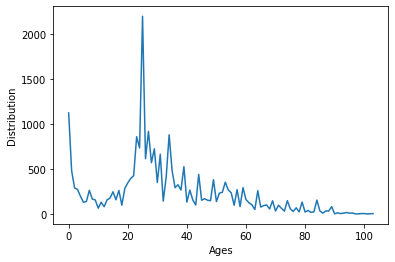

In [31]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show

In [32]:
len(genders)

23708

In [33]:
##defining labels for output

In [34]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

In [35]:
#creating another list of images from existing one for better learning

In [36]:
images_f_2=images_f/255

In [37]:
images_f_2.shape

(23708, 48, 48, 3)

In [38]:
labels_f=np.array(labels)

## Splitting the dataset into test and train

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [41]:
Y_train[0:5]

array([[39,  0],
       [55,  1],
       [ 1,  1],
       [68,  0],
       [56,  1]])

## Splitting "y_test" and "y_train"

In [42]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [43]:
Y_train_2[0][0:5]

array([0, 1, 1, 0, 1])

In [44]:
Y_train_2[1][0:5]

array([39, 55,  1, 68, 56])

## defining the model

In [45]:
def Convolution(input_tensor, filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation("relu")(x)
    return x


In [46]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten=Flatten()(maxp_4)
    dense_1=Dense(64,activation="relu")(flatten)
    dense_2=Dense(64,activation="relu")(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation="sigmoid",name="sex_out")(drop_1)
    output_2=Dense(1,activation="relu",name="age_out")(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy"])
    return model

In [47]:
Model = model((48,48,3))

In [48]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 48, 48, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 48, 48, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 48, 48, 32)   0           dropout[0][0]                    
______________________________________________________________________________________________

In [49]:
from tensorflow.keras.callbacks import ModelCheckpoint

## Initializing the model

In [50]:
fle_s='Age_Sex_Detection.h5'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

## Running the model

In [51]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks=callback_list)

Epoch 1/250


TypeError: in user code:

    C:\Users\Reshma R\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    C:\Users\Reshma R\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Reshma R\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Reshma R\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Reshma R\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Reshma R\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    C:\Users\Reshma R\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    C:\Users\Reshma R\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\Reshma R\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\functional.py:420 call
        return self._run_internal_graph(
    C:\Users\Reshma R\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\functional.py:556 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\Reshma R\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\Reshma R\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\layers\core.py:230 call
        output = control_flow_util.smart_cond(training, dropped_inputs,
    C:\Users\Reshma R\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\utils\control_flow_util.py:109 smart_cond
        return smart_module.smart_cond(
    C:\Users\Reshma R\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\framework\smart_cond.py:54 smart_cond
        return true_fn()
    C:\Users\Reshma R\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\layers\core.py:226 dropped_inputs
        noise_shape=self._get_noise_shape(inputs),
    C:\Users\Reshma R\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\keras\layers\core.py:215 _get_noise_shape
        for i, value in enumerate(self.noise_shape):

    TypeError: 'int' object is not iterable


## model evaluation

In [62]:
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 40s 50ms/step - loss: 34.4748 - sex_out_loss: 0.6932 - age_out_loss: 33.4768 - sex_out_accuracy: 0.5215 - age_out_accuracy: 0.0000e+00


[34.474822998046875,
 0.6932011842727661,
 33.476802825927734,
 0.5215117335319519,
 0.0]

In [63]:
pred=Model.predict(X_test)


In [64]:
pred[1]

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

## plotting loss

In [1]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

NameError: name 'plt' is not defined

## plotting sex accuracy

In [2]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

NameError: name 'plt' is not defined

## plotting gender accuracy

In [3]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

NameError: name 'plt' is not defined

## Making report of the model gender only

In [6]:
i=0
Pred_1=[]
while(i<len(pred[0])):
    Pred_1.append(int(np.round(pred[0][i])))
    i=i+1
    

NameError: name 'pred' is not defined

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [8]:
report=classification_report(Y_test_2[0],Pred_1)

NameError: name 'Y_test_2' is not defined

In [9]:
print(report)

NameError: name 'report' is not defined

## making heatmap of the model(gender only)

In [ ]:
results=confusion_matrix(Y_test_2[0],Pred_1)

In [10]:
import seaborn as sns
sns.heatmap(results,annot=True)

NameError: name 'results' is not defined

## Testing the images ourself

In [11]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])

## test 1

In [12]:
test_image(4,images_f,images_f_2,Model)

NameError: name 'images_f' is not defined

## test 2

In [13]:
test_image(23,images_f,images_f_2,Model)

NameError: name 'images_f' is not defined

## test 3

In [14]:
test_image(168,images_f,images_f_2,Model)

NameError: name 'images_f' is not defined

## test 4
### error in age in this case

In [15]:
test_image(888,images_f,images_f_2,Model)

NameError: name 'images_f' is not defined

## test 5

In [16]:
test_image(1288,images_f,images_f_2,Model)

NameError: name 'images_f' is not defined